In [1]:
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt

In [10]:
bank = ['02-09 leicester RM.png',
'04-01 bournemouth LL.png',
'05-02 crystal LL.png',
'05-09 arsenal LM.png',
'07-01 everton LL.png',
'09-02 burnley RR.png',
'10-10 everton RL.png',
'11-11 villa LL.png',
'14-01 city.png',
'14-11 fullham RL.png',
'20-04 liverpool RM.png',
'20-10 spurs LM.png',
'22-12 burnley LR.png',
'23-01 arsenal RL.png',
'23-08 liverpool LM.png',
'23-10 chelsea RM.png',
'25-01 Nottingham.png',
'28-01 reading LL.png']
coordinate = []
s1= 316
s2 = 800

In [11]:
def findcenter(coordinate,cnts):
    global s1
    global s2
    xcnts = []

    for cnt in cnts:
        if s1 < cv2.contourArea(cnt) < s2:
            #xcnts.append(cnt)
            ((x, y), r) = cv2.minEnclosingCircle(cnt)
            coordinate.append([round(x)/7.15,round(y)/7.35])
    return coordinate
        #cv2.circle(image, (int(x), int(y)), int(r), (36, 255, 12), 1)
# print("Dots number: {}".format(len(xcnts)))
# print(coordinate)

In [12]:
for file in bank:
    image = cv2.imread(file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    threshed = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
    cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    findcenter(coordinate, cnts)

In [13]:
coordinate = np.array(coordinate)
coordinate = pd.DataFrame(coordinate, columns = ['x','y'])


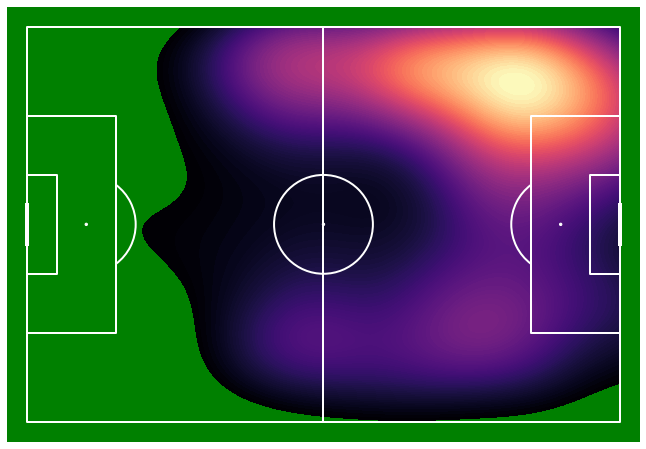

In [15]:
fig, ax = plt.subplots(figsize = (13.5,8))
# fig.set_facecolor('#22312b')
# ax.patch.set_facecolor('#22312b')
pitch = Pitch(pitch_type = 'statsbomb', pitch_color = 'green', line_color = 'white',line_zorder=2)
pitch.kdeplot(coordinate['x'], coordinate['y'], cmap='magma', fill=True, levels=100, ax=ax)
pitch.draw(ax = ax)
# plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
                       

#kde = sns.kdeplot(coordinate['x'], coordinate['y'],ax = ax, fill=True, alpha = 0.5, thresh=0, levels=100,  cmap = 'magma')

In [81]:
image = cv2.imread('07-01 everton LL_MM.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshed = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

In [82]:
xcnts = []

for cnt in cnts:
    if s1 < cv2.contourArea(cnt) < s2:
        xcnts.append(cnt)
        ((x, y), r) = cv2.minEnclosingCircle(cnt)
        coordinate.append([round(x)/7.15,round(y)/7.35])
        cv2.circle(image, (int(x), int(y)), int(r), (36, 255, 12), 1)
print("Dots number: {}".format(len(xcnts)))

Dots number: 7


C:\Users\75109\AppData\Local\Temp\ipykernel_27892\719667068.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coordinate.append([round(x)/7.15,round(y)/7.35])


In [38]:
convexityDefects = []
xcnts = []
for contour in xcnts:
    if cv2.contourArea(contour) >300 :
        convexHull = cv2.convexHull(contour, returnPoints = False)
        #print(convexHull)
        convexityDefects.append(cv2.convexityDefects(contour, convexHull))
        convexHull = cv2.convexHull(contour)
        cv2.drawContours(image, [convexHull], -1, (36, 255, 12), 2)


Dots number: 0


In [83]:
cv2.imshow('image', image)
cv2.waitKey()

-1

In [27]:
print(convexityDefects)

[]


In [4]:
import matplotlib.pyplot as plt
import numpy as np

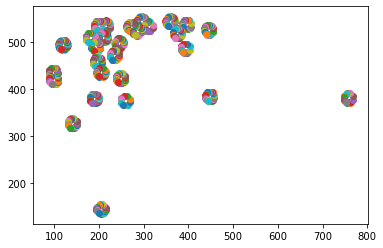

In [56]:
for cnt in xcnts:
    for item in cnt:
        #print(item[0][1])
        plt.scatter(item[0][0], item[0][1])

In [37]:
print(xcnts)

[array([[[377, 569]],

       [[378, 568]],

       [[385, 568]],

       [[387, 570]],

       [[388, 570]],

       [[389, 571]],

       [[389, 572]],

       [[391, 574]],

       [[391, 581]],

       [[390, 582]],

       [[390, 583]],

       [[385, 588]],

       [[378, 588]],

       [[377, 587]],

       [[376, 587]],

       [[372, 583]],

       [[372, 581]],

       [[371, 580]],

       [[371, 576]],

       [[372, 575]],

       [[372, 574]],

       [[373, 573]],

       [[373, 572]],

       [[376, 569]]], dtype=int32), array([[[310, 569]],

       [[311, 568]],

       [[317, 568]],

       [[318, 569]],

       [[319, 569]],

       [[323, 573]],

       [[323, 574]],

       [[324, 575]],

       [[324, 581]],

       [[323, 582]],

       [[323, 583]],

       [[319, 587]],

       [[318, 587]],

       [[317, 588]],

       [[311, 588]],

       [[310, 587]],

       [[309, 587]],

       [[305, 583]],

       [[305, 582]],

       [[304, 581]],

       [[304, 575

In [52]:
for cnt in cnts:
    print(cv2.contourArea(cnt))
    
print(len(cnts))

326.5
325.5
618.5
645.5
328.0
610.0
323.5
326.0
327.0
327.5
327.0
325.5
321.0
327.5
327.0
321.0
328.0
605.5
328.0
321.0
328.0
324.0
327.5
323.0
530753.5
25


In [51]:
image = cv2.imread('07-01 everton LL.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshed = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

In [52]:
cnts = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 500:
        cv2.drawContours(threshed,[c],0,0,-1)

In [53]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
erosion = cv2.erode(threshed, kernel, iterations=3)

In [54]:
cnts = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    print(area)
    if area > 20 and area < 50 :
        ((x, y), r) = cv2.minEnclosingCircle(c)
        cv2.circle(image, (int(x), int(y)), int(r), (36, 255, 12), 2)

107.5
515065.5


In [55]:
#cv2.imshow('thresh', threshed)
cv2.imshow('image', image)
cv2.waitKey()

-1

In [76]:
from PIL import Image

In [ ]:
new = Image.open('07-01 everton LL_M.png')
width, height = new.size
modified = Image.new('RGBA',(width,height),'white')
pixels = modified.load()
for y in range(height):
    for x in range(width):
        r1,g1,b1,a1 = new.getpixel((x,y))
        print(r1,g1,b1,a1)
        if r1 != 235 and g1 == 91 and b1 == 20:
            r1 = 0
            g1 = 0 
            b1 = 0 
            a1 = 0
        pixels[x, y] = (r1, g1, b1, a1)


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
35 13 3 42
74 29 6 90
113 44 10 138
150 58 13 182
118 45 10 143
78 30 7 95
39 15 3 47
0 0 0 0
0 0 0 0
181 69 16 221
210 81 18 255
228 89 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
225 87 19 255
210 81 18 255
150 57 13 183
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
89 34 8 108
210 81 18 255
210 81 18 255
219 84 19 255
233 91 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
234 91 20 255
220 85 18 255
210 81 18 255
210 81 18 255
215 83 18 255
235 91 2

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
46 18 4 56
210 81 18 255
213 82 18 255
233 90 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
164 62 13 199
210 81 18 255
228 88 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
232 90 20 255
21

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
134 51 12 164
210 81 18 255
226 87 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
228 88 19 255
210 81 18 255
202 78 16 245
210 81 18 255
210 81 18 255
219 84 19 255
224 87 19 255
228 89 20 255
227 88 19 255
223 86 19 255
218 84 19 255
210 81 18 255
210 81 18 255
161 62 14 195
43 16 4 52
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
56 22 5 68
210 81 18 255
215 83 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
218 85 19 255
210 81 18 255

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
3 1 0 3
180 70 15 219
210 81 18 255
223 86 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
225 87 19 255
210 81 18 255
198 77 16 242
23 9 2 28
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
62 24 5 76
210 81 18 255
210 81 18 255
229 89 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
232 90 19 255
211 82 18 255
210 81 18 255
81 31 7 99
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
226 88 19 255
212 82 18 255
210 81 18 255
137 52 12 167
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
72 28 6 88
190 72 15 231
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
202 78 17 248
85 33 7 104
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
39 15 3 47
78 30 7 95
107 41 9 130
69 26 6 83
29 11 2 36
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
96 37 8 116
210 81 18 255
210 81 18 255
217 84 19 255
231 89 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
228 88 19 255
214 83 18 255
210 81 18 255
210 81 18 255
53 20 4 64
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0

227 88 20 255
222 86 19 255
210 81 18 255
210 81 18 255
184 71 16 223
64 25 5 78
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
157 61 14 192
210 81 18 255
220 85 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
215 83 18 255
210 81 18 255
114 44 10 139
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
83 32 7 101
123 47 10 149
161 62 14 197
201 78 16 244
189 72 15 230
150 58 13 182
111 43 8 135
65 25 6 79
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
114 44 10 139
210 81 18 255
223 86 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
217 84 18 255
210 81 18 255
63 24 5 77

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
224 86 19 255
210 81 18 255
123 47 11 149
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
134 51 12 164
210 81 18 255
225 87 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
226 87 19 255
210 81 18 255
138 52 12 167
0 0 0 0
125 49 11 153
210 81 18 255
214 82 18 255
228 88 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
234 91 20 255
220 85 19 255
210 81 18 255
198 76 16 242
25 9 2 30
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
141 54 11 171
210 81 18 255
226 88 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
233 90 20 255
210 81 18 255
202 78 16 245
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
157 61 13 191
210 81 18 255
228 88 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
219 84 19 255
210 81 18 255
79 31 7 96
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
164 62 13 199
210 81 18 255
229 89 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 2

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
27 10 2 33
210 81 18 255
213 82 18 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
215 83 18 255
210 81 18 255
43 17 4 52
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
155 60 13 188
210 81 18 255
224 86 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
226 87 20 255
210 81 18 255
170 65 15 208
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
73 28 6 89
210 81 18 255
210 81 18 255
231 90 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
233 90 20 255
212 81 18 255
210 81 18 255
87 34 7 106
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
77 30 7 93
194 74 17 237
210 81 18 255
211 82 18 255
223 86 19 255
226 88 20 255
232 89 19 255
232 90 20 255
227 88 19 255
223 86 19 255
211 81 18 255
210 81 18 255
202 77 16 245
83 32 7 101
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
47 18 4 57
86 33 7 105
126 48 11 152
157 61 14 192
122 46 10 148
83 32 7 100
43 1

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
48 18 4 58
166 64 13 201
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
156 59 13 189
38 15 3 46
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
109 42 9 132
210 81 18 255
224 87 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
230 89 20 255
210 81 18 255
166 63 13 202
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
101 39 9 123
210 81 18 255
213 82 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
214 82 19 255
210 81 18 255
111 43 8 135
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
112 43 10 137
210 81 18 255
225 87 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
231 90 19 255
210 81 18 255
169 65 15 206
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
36 14 3 44
210 81 18 255
217 84 18 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 

229 88 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
215 82 19 255
210 81 18 255
31 12 3 38
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
40 16 3 49
210 81 18 255
215 83 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
221 86 19 255
210 81 18 255
94 36 8 115
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


7 2 1 8
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
20 8 2 25
81 31 7 99
121 47 10 146
160 62 14 194
194 75 17 235
156 60 13 190
118 45 10 143
78 30 7 95
11 4 1 14
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
159 61 14 193
210 81 18 255
225 87 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
225 87 19 255
210 81 18 255
170 65 15 206
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
96 37 8 117
210 81 18 255
221 86 18 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
213 82 19 255
210 81 18 255
34 13 3 41
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0

210 81 18 255
213 82 18 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
215 83 18 255
210 81 18 255
42 16 4 51
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
17 7 1 21
210 81 18 255
211 81 18 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
228 88 20 255
210 81 18 255
161 61 14 196
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
67 26 6 81
210 81 18 255
210 81 18 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
43 16 4 52
82 32 7 100
122 46 10 148
161 62 14 195
140 54 12 170
101 39 9 122
61 24 5 75
13 5 1 16
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0

235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
212 82 18 255
210 81 18 255
23 9 2 28
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
217 85 19 255
210 81 18 255
76 29 6 92
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
216 84 18 255
210 81 18 255
124 48 11 151
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
4 1 0 5
43 1

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
143 55 12 174
210 81 18 255
210 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
100 38 9 121
210 81 18 255
210 81 18 255
216 84 18 255
229 89 20 255
234

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
48 18 4 58
166 63 13 202
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
112 43 10 136
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
111 43 8 135
210 81 18 255
222 86 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
217 83 19 255
210 81 18 255
69 26 6 83
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
139 54 12 169
210 81 18 255
217 83 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
221 85 19 255
210 81 18 255
161 63 14 197
10 4 1 12
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


235 91 20 255
219 84 19 255
210 81 18 255
119 46 10 144
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
134 51 12 164
210 81 18 255
225 87 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 25

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
96 37 8 116
210 81 18 255
221 85 18 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
216 83 18 255
210 81 18 255
53 20 4 64
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
48 19 4 59
210 81 18 255
210 81 18 255
228 88 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
224 86 19 255
210 81 18 255
193 75 17 235
8 3 1 9
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
76 29 7 93
210 81 18 255
221 85 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
223 86 19 255
210 81 18 255
134 52 11 163
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
164 62 13 199
210 81 18 255
223 86 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 2

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
230 88 20 255
211 82 18 255
210 81 18 255
83 32 7 101
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 

219 85 19 255
210 81 18 255
148 57 13 181
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
71 28 6 87
189 72 15 231
210 81 18 255
210 81 18 255
218 84 18 255
223 86 19 255
227 88 20 255
224 87 19 255
220 85 19 255
216 83 18 255
210 81 18 255

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
141 54 11 171
210 81 18 255
226 87 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
229 88 20 255
210 81 18 255
207 80 18 251
212 82 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
224 87 19 255
210 81 18 255
148 56 13 180
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
19 7 2 23
210 81 18 255
208 81 18 254
228 88 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
217 84 18 255
210 81 18 255
69 27 6 83
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
39 15 3 48
157 61 13 191
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
193 75 1

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
183 71 16 222
210 81 18 255
223 86 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
226 88 20 255
210 81 18 255
210 81 18 255
19 7 2 23
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
18 7 2 22
168 65 14 204
210 81 18 255
210 81 18 255
213 82 18 255
217 84 19 255
221 85 19 255
21

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
193 73 16 234
210 81 18 255
210 81 18 255
227 87 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
228 88 19 255
213 82 18 255
210 81 18 255
210 81 18 255
10 4 1 12
0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
138 53 12 168
210 81 18 255
210 81 18 255
219 84 19 255
227 87 19 255
232 90 19 255
235 91 20 255
233 91 20 255
228 88 20 255
223 86 19 255
210 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
83 32 7 100
202 77 16 245
210 81 18 255
210 81 18 255
210 81 18 255
212 82 18 255
210 81 18 255
210 81 18 255
210 81 18 255
210 81 18 255
124 48 11 150
5 2 0 6
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
27 10 2 33
110 42 9 133
148 57 13 181
189 72 15 230
210 81 18 255
203 77 16 246
162 63 14 198
124 48 11 150
67 26 6 81
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
15 6 1 18
76 29 7 93
114 44 10 139
161 61 14 196
210 81 18 255
165 64 13 200
120 46 10 146
84 32 7 102
41 16 3 49
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 1 2 3
0 7 15 21
0 9 20 28
0 4 8 11
0 24 55 76
0 62 144 197
0 81 186 255
0 81 186 255
0 81 185 255
0 80 184 250
0 73 168 230
0 63 145 198
0 67 154 211
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
21 81 168 254
52 69 118 220
52 36 44 117
3 2 2 6
0 1 2 2
0 1 1 2
0 0 1 1
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
195 76 17 238
210 81 18 255
232 90 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
232 90 20 255
210 81 18 255
206 78 18 250
0 0 0 0
70 27 6 85
140 54 12 170
208 81 18 254
202 82 24 255
93 80 111 255
0 81 1

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 4 9 12
0 9 21 29
0 24 55 75
0 41 95 130
0 59 134 184
0 76 174 238
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 254
0 79 182 249
0 77 178 243
0 77 177 243
0 77 178 242
0 77 177 242
0 77 177 242
0 75 173 237
0 71 164 225
0 51 117 161
0 13 30 42
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 25 57 77
0 64 147 202
0 80 184 253
0 81 186 254
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 254
0 80 184 253
0 77 177 243
0 72 165 227
0 70 160 220
0 67 154 211
0 60 136 186
0 44 101 138
0 26 61 84
0 22 52 72
0 49 114 156
0 75 173 237
0 80 185 253
0 81 187 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
10 79 175 250
10 75 164 236
3 72 162 226
0 71 163 223
0 71 163 22

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 13 31 43
0 39 88 121
0 66 152 208
0 80 183 251
0 80 183 252
0 80 183 252
0 77 177 243
0 72 165 227
0 56 129 176
0 29 66 90
0 7

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 81 185 254
0 81 186 255
0 81 186 255
0 81 186 255
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 2 5 7
0 21 48 65
0 53 121 165
0 70 161 220
0 70 160 220
0 71 163 223
0 78 178 244
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
1 80 184 253
2 81 183 254
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 80 182 249
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 69 159 218
0 43 99 136
0 22 50 68
0 9 22 30
0 4 8 11
0 1 2 2
0 0 1 2
0 3 7 9
0 5 13 17
0 8 19 27
0 12 28 38
0 28 66 89
0 51 116 158
0 73 169 231
0 81 187 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 25

7 81 180 255
3 81 183 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 79 181 248
0 57 129 177
0 15 35 47
0 0 1 1
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 1 2 3
0 7 17 23
0 31 72 100
0 62 144 198
0 71 163 223
0 76 176 241
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
80 31 7 97
120 47 10 147
161 62 14 195
199 76 16 243
202 78 16 245
162 63 14 198
123 48 11 150
82 32 7 100
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
85 33 7 103
203 78 17 248
210 81 18 255
212 82 18 255
224 87 19 255
228 88 20 255
233 91 19 255
233 90 20 255
228 88 20 255
224 86 19 25

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
65 25 6 79
210 81 18 255
217 84 18 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
218 84 18 255
210 81 18 255
74 28 6 89
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 20 47 65
0 65 150 205
0 81 186 255
0 78 179 246
0 80 183 251
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 77 177 243
0 62 142 194
0 23 53 73
0 3 6 8
0 0 0 0
0 6 15 20
0 41 94 129
0 73 168 230
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
49 69 122 221
66 79 127 248
17 81 172 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 

0 81 186 255
0 81 186 255
0 81 186 255
0 78 179 245
0 30 68 93
0 3 6 8
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 3 6 8
0 21 49 68
0 38 88 122
0 27 62 86
0 24 55 75
0 46 106 145
0 73 168 230
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 79 182 250
0 46 106 146
0 10 22 31
0 0 0 0
0 0 0 0
0 5 12 17
0 11 25 35
0 39 90 123
0 72 165 226
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 78 179 246
0 30 69 95
10 24 48 77
16 70 147 220
0 81 186 255
0 81 186 255
0 81 186 255
16 81 174 255
7 80 181 255
0 81 186 255
0 81 186 255
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
143 55 12 174
210 81 18 255
220 85 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
216 84 18 255
210 81 18 255
105 40 9 127
0 0 0 0
0 0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
93 36 8 113
210 81 18 255
210 81 18 255
213 82 19 255
224 86 20 255
230 89 19 255
234 90 20 255
234 90 20 255
229 88 19 255
224 86 20 255
213 82 19 255
210 81 18 255
210 81 18 255
92 35 8 112
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
63 24 5 76
210 81 18 255
210 81 18 255
229 89 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
230 88 19 255
210 81 18 255
210 81 18 255
61 24 5 74
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 1 2
0 5 11 16
0 16 37 51
0 44 100 136
0 72 165 226
0 81 185 253
0 81 186 255
0 81 186 255
0 81 186 255
0 81 187 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
1 81 184 254
6 78 175 245
3 69 156 218
0 42 97 133
0 15 34 47
0 2 5 6
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 

0 1 2 3
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 1 2
0 2 5 7
0 6 14 19
0 9 20 27
0 10 22 30
0 14 31 43
0 32 74 101
0 61 139 191
0 78 179 245
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
0 81 186 255
1 78 180 247
0 59 134 184
0 32 75 104
0 60 139 192
0 71 164 225
0 68 155 213
0 39 89 123
0 10 24 33
0 1 2 3
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
3 1 0 3
208 81 18 254
210 81 18 255
234 90 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
231 89 20 255
210 81 18 255
183 70 16 223
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
81 31 7 99
210 81 18 255
219 84 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
61 23 5 74
210 81 18 255
216 84 18 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
213 82 19 255
210 81 18 255
34 13 3 41
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
19 7 2 24
193 75 17 236
210 81 18 255
220 85 19 255
233 90 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
227 88 19 255
214 82 19 255
210 81 18 255
124 48 11 151
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
23 9 2 28
46 18 4 56
7 3 1 9
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
54 21 5 65
171 66 15 209
210 81 18 255
210 81 18 255
219 85 19 255
225 87 19 255
229 89 19 255
229 89 20 255
224 87 19 255
220 85 19 255
211 81 18 255
210 81 18 255
184 71 16 225
67 26 6 81
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
12 5 1 15
185 71 16 225
210 81 18 255
213 82 18 255
228 89 19 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
235 91 20 255
229 89 19 255
216 83 18 255
210 81 18 255
204 78 17 249
31 12 3 38
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0

0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0
0 0 0 0


In [80]:
modified.save('07-01 everton LL_MM.png','PNG') 